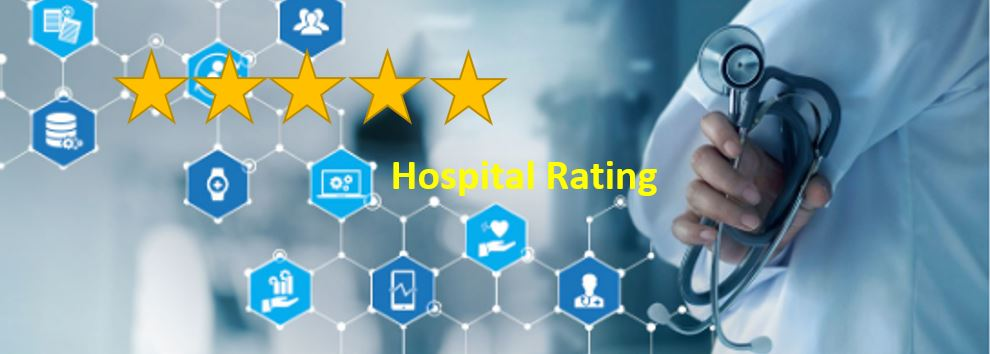

In [13]:
from IPython import display
display.Image('./hospital rating.JPG')

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualisation
import seaborn as sns #for visualisation
import os
%matplotlib inline 

In [134]:
os.chdir(r'H:\Hospital rating')

In [135]:
hospital_data=pd.read_csv("Hospital General Information.csv")
hospital_data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [136]:
hospital_data.shape

(4812, 28)

In [21]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [22]:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (hospital_data.apply(num_missing, axis=0) )#axis=0 defines that function is to be applied on each column

Missing values per column:
Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         143
Hospital overall rating                                             0
Hospital overall rating footnote                               

<AxesSubplot:>

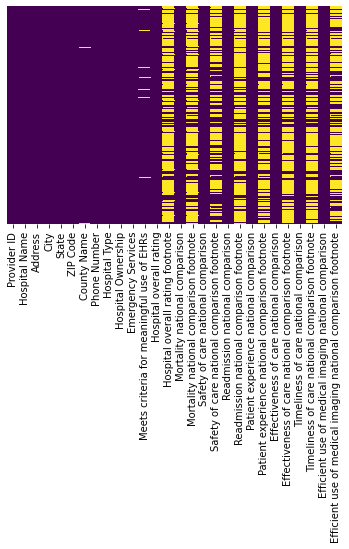

In [64]:
#Heatmap showing missing data of each column
sns.heatmap(hospital_data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [23]:
hospital_data.shape

(4812, 28)

<AxesSubplot:xlabel='State'>

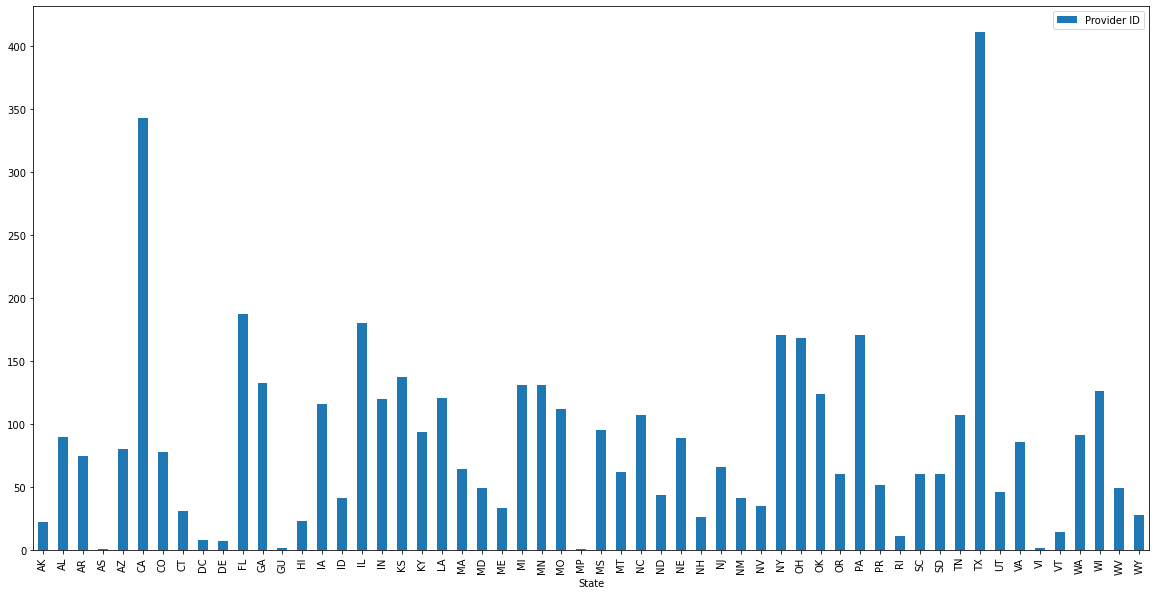

In [70]:
#number of hospitals in each state
df1=hospital_data.groupby(['State'])['Hospital Name'].count()
df1


hospital_data.describe(exclude=[np.number])
hospital_data.describe(include=[np.number])

df1=hospital_data.groupby('State')[['Provider ID']].count()
#df2.plot.pie(subplots=True,figsize=(5,5))
df1.plot.bar(figsize=(20,10))
#plt.figure(figsize=(20,10))


Text(0.5, 1.0, 'Number of Hospitals per State')

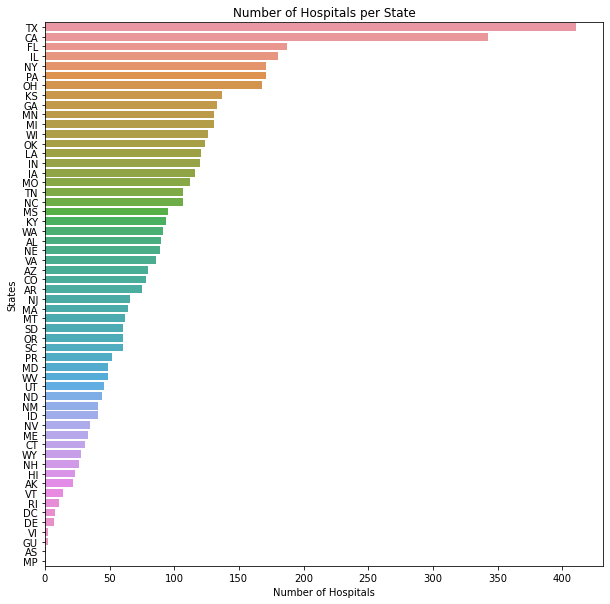

In [76]:
#Number of hospitals per state
Total_state = pd.value_counts(hospital_data['State'])
Total_state = pd.DataFrame(Total_state)
Total_state = Total_state.reset_index()

Total_state.columns = ['State', 'Number of Hospitals']

dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Number of Hospitals', y = 'State', data = Total_state)
ax.set(xlabel = 'Number of Hospitals', ylabel = 'States')
ax.set_title('Number of Hospitals per State')

Text(0.5, 1.0, 'Count of the different Types of Hospital Ownership')

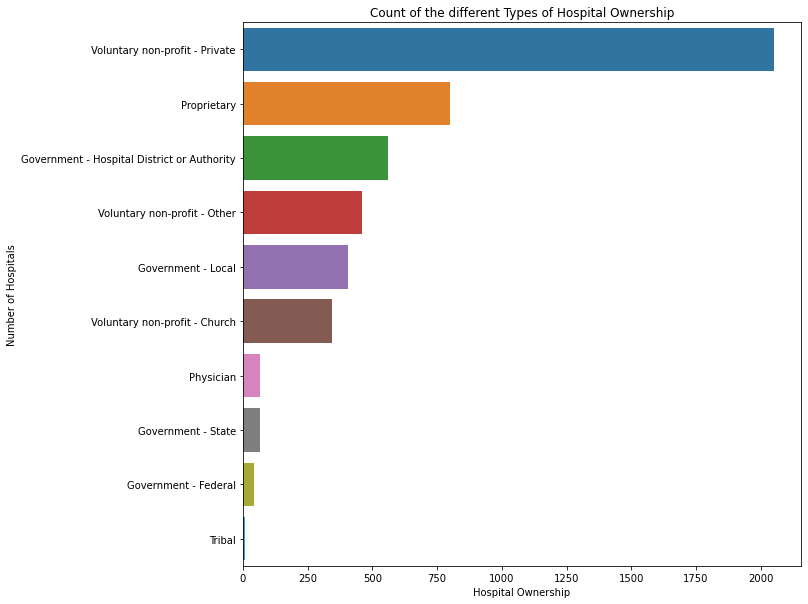

In [77]:
Hospital_owner = pd.value_counts(hospital_data['Hospital Ownership'])
Hospital_owner = pd.DataFrame(Hospital_owner)
Hospital_owner = Hospital_owner.reset_index()
Hospital_owner.columns = ['Hospital Ownership', 'Number of Hospitals']

dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(y = 'Hospital Ownership', x= 'Number of Hospitals', data = Hospital_owner)
ax.set(xlabel = 'Hospital Ownership', ylabel = 'Number of Hospitals')
ax.set_title('Count of the different Types of Hospital Ownership')

We can see that most of the hospitals are owned by Physician.
Also the hospitals under Church which is non-profit organisation are very few

Text(0.5, 1.0, 'Total rating of the types of hospitals under the ownership of various community')

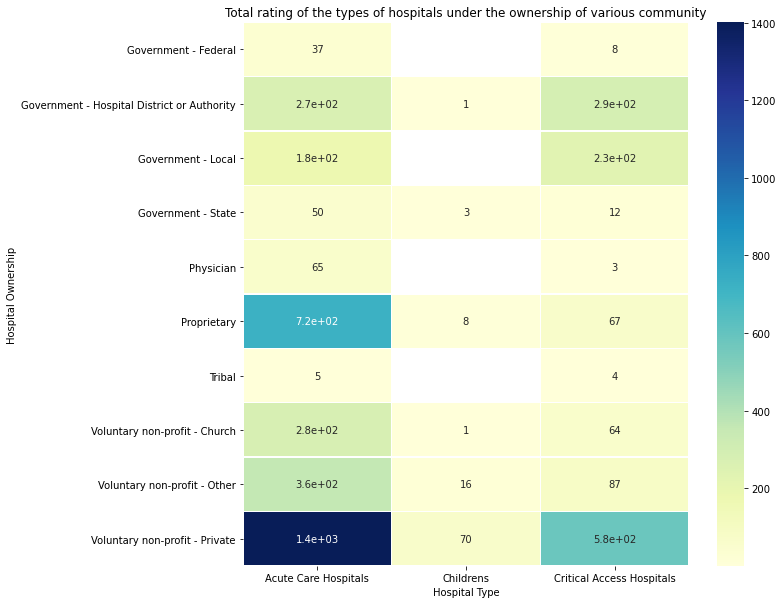

In [29]:
a= pd.pivot_table(hospital_data,values=['Hospital overall rating'],index=['Hospital Ownership'],columns=['Hospital Type'],aggfunc='count',margins=False)

plt.figure(figsize=(10,10))
sns.heatmap(a['Hospital overall rating'],linewidths=.5,annot=True,vmin=0.01,cmap='YlGnBu')
plt.title('Total rating of the types of hospitals under the ownership of various community')

We can see that there are few hospitals whose ratings are "Not Available". We can remove those rows from our new dataset for Hospital rating before counting the number of hospitals for each rating

[Text(0.5, 0, 'Hospital Rating'), Text(0, 0.5, 'Number of Hospitals')]

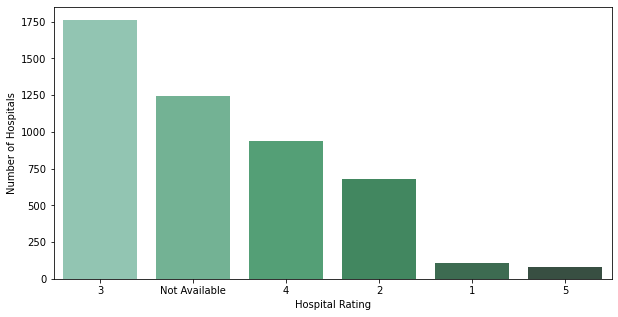

In [80]:
Hospital_rating = hospital_data
Hospital_rating['Hospital overall rating'].unique()

Hospital_rating = pd.value_counts(Hospital_rating['Hospital overall rating'])
Hospital_rating = pd.DataFrame(Hospital_rating)
Hospital_rating = Hospital_rating.reset_index()
Hospital_rating.columns = ['Hospital Rating', 'Number of Hospitals']

dims = (10, 5)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Hospital Rating', y = 'Number of Hospitals', palette="BuGn_d",data = Hospital_rating)
ax.set(xlabel = 'Hospital Rating', ylabel = 'Number of Hospitals')

In [31]:
#Let us drop those rows where Hospital overall Rating==Not Available
AvailableRating_data=hospital_data.drop(hospital_data[hospital_data['Hospital overall rating']=='Not Available'].index)
#AvailableRating_data.info()

In [32]:
#Sorting the values in Descending order as per the overall rating of the hospitals
sorted_rating=AvailableRating_data.sort_values(['Hospital overall rating'], ascending=False)
sorted_rating['Hospital overall rating'].head()
sorted_rating[['Hospital Name','Hospital overall rating']].head()

,Hospital Name,Hospital overall rating
2079,MCLAREN - NORTHERN MICHIGAN,5
2006,NEW ENGLAND BAPTIST HOSPITAL,5
146,BANNER HEART HOSPITAL,5
145,MAYO CLINIC HOSPITAL,5
3805,AVERA HEART HOSPITAL OF SOUTH DAKOTA,5


In [33]:
Unique_sorted_rating=sorted_rating['Hospital overall rating'].unique()
Unique_sorted_rating

array(['5', '4', '3', '2', '1'], dtype=object)

###### Finding all the rows with rating 5,4,3,2,1 and separating them and keeping a count of those rows which belongs to that particular rating category

In [34]:
rating_with_5=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='5']
Rating_5=rating_with_5['Provider ID'].count()
#rating_with_5[['Hospital Name','Hospital overall rating']].head()
rating_with_4=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='4']
Rating_4=rating_with_4['Provider ID'].count()
rating_with_3=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='3']
Rating_3=rating_with_3['Provider ID'].count()
rating_with_2=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='2']
Rating_2=rating_with_2['Provider ID'].count()
rating_with_1=sorted_rating.loc[sorted_rating['Hospital overall rating'] =='1']
Rating_1=rating_with_1['Provider ID'].count()
list=[Rating_5,Rating_4,Rating_3,Rating_2,Rating_1]
list
print(Rating_5,Rating_4,Rating_3,Rating_2,Rating_1)

82 939 1761 678 107


[Text(0.5, 0, 'Rating out of 5'), Text(0, 0.5, 'Number of  hospitals')]

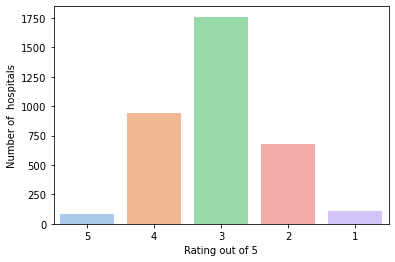

In [35]:
ax=sns.barplot(x=Unique_sorted_rating,y=list,data=hospital_data,palette='pastel')
ax.set(xlabel='Rating out of 5', ylabel='Number of  hospitals')

In [36]:
#Thus we can see that most of the hospitals are given the rating of 3.Hospitals with very high rating(5) and very low rating(1) are very few.
#Which states has maximum number of 5 star rating hospitals?
hospital_data['Hospital Type'].unique()

array(['Acute Care Hospitals', 'Critical Access Hospitals', 'Childrens'],
      dtype=object)

In [37]:
#Acute care hospitals with 5 star rating.
State_acute_5=hospital_data.loc[(hospital_data["Hospital Type"]=="Acute Care Hospitals") & (hospital_data["Hospital overall rating"]=="5"),["State"]]
State_acute_5.head()

,State
23,AL
65,AL
76,AL
145,AZ
146,AZ


In [38]:
S_A_5=State_acute_5['State'].value_counts()
index=S_A_5.index
values=S_A_5.values
values

array([11,  6,  6,  5,  5,  4,  4,  4,  4,  3,  2,  2,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

[Text(0.5, 0, 'Total number of Acute Care hospitals with 5 rating'),
 Text(0, 0.5, 'States')]

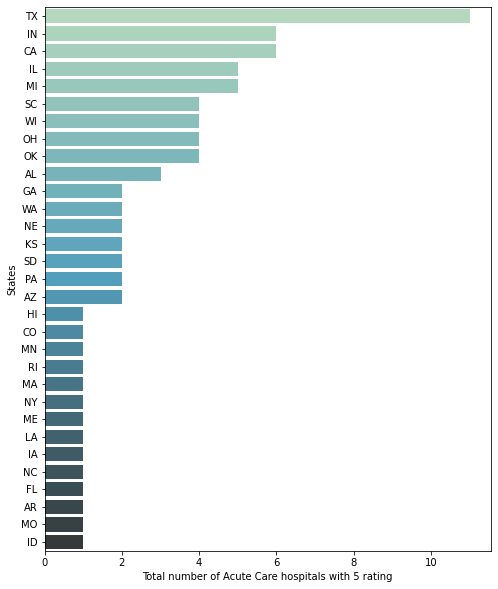

In [39]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=index,x=values,palette='GnBu_d')
ax.set(xlabel='Total number of Acute Care hospitals with 5 rating', ylabel='States')

In [40]:
#Thus Texas leads with Acute care hospitals with 5 star rating
#Critical Access Hospitals with 5 star rating
Critical_access_5=hospital_data.loc[(hospital_data["Hospital Type"]=="Critical Access Hospitals") & (hospital_data["Hospital overall rating"]=="5"),["State"]]
C_A_5=Critical_access_5['State'].value_counts()
C_A_5
index=C_A_5.index
values=C_A_5.values
values

array([1, 1], dtype=int64)

[Text(0.5, 0, 'Total number of Critical Care hospitals with 5 rating'),
 Text(0, 0.5, 'States')]

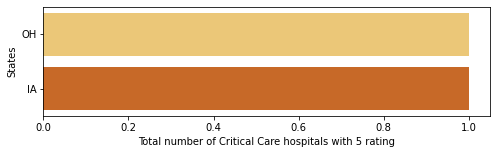

In [41]:
dims = (8, 2)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=index,x=values,palette='YlOrBr')
ax.set(xlabel='Total number of Critical Care hospitals with 5 rating', ylabel='States')

In [42]:
#Thus there are only two states with Critical Acess hospitals each with rating as 5
#Childrens Hospitals with 1 star rating
Chidrens_5=hospital_data.loc[(hospital_data["Hospital Type"]=="Childrens") & (hospital_data["Hospital overall rating"]=="5"),["State"]]
C_5=Chidrens_5['State'].value_counts()
C_5
index=C_5.index
values=C_5.values
values
index

Index([], dtype='object')

In [43]:
#Thus there no hospitals for childrens with 5 star rating
#Which states has maximum number of 1 star rating hospitals?
#Acute care hospitals with 1 star rating.
State_acute_1=hospital_data.loc[(hospital_data["Hospital Type"]=="Acute Care Hospitals") & (hospital_data["Hospital overall rating"]=="1"),["State"]]
State_acute_1.head()
#State_acute_1['State'].unique()
S_A_1=State_acute_1['State'].value_counts()
index=S_A_1.index
values=S_A_1.values
values

array([33,  9,  7,  6,  6,  5,  4,  4,  4,  3,  3,  2,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

[Text(0.5, 0, 'Total number of Acute Care hospitals with 1 rating'),
 Text(0, 0.5, 'States')]

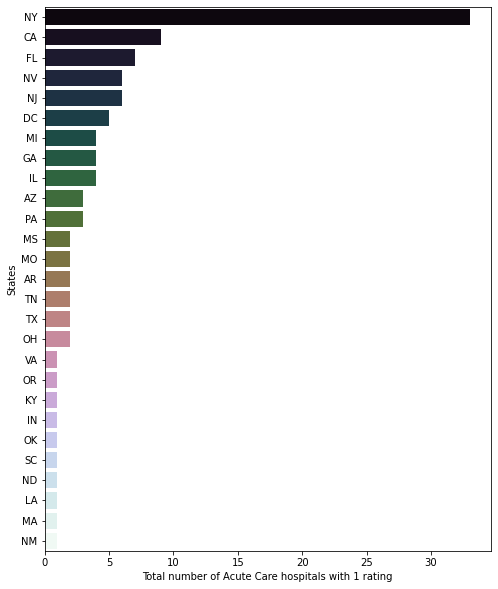

In [44]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=index,x=values,palette='cubehelix')
ax.set(xlabel='Total number of Acute Care hospitals with 1 rating', ylabel='States')

In [45]:
#New york has maximum number of Acute care hospitals with 1 star rating
#Critical Access Hospitals with 1 star rating
Critical_access_1=hospital_data.loc[(hospital_data["Hospital Type"]=="Critical Access Hospitals") & (hospital_data["Hospital overall rating"]=="1"),["State"]]
C_A_1=Critical_access_1['State'].value_counts()
C_A_1
index=C_A_1.index
values=C_A_1.values
values

array([1], dtype=int64)

[Text(0.5, 0, 'Total number of Critical Acess hospitals with 1 rating'),
 Text(0, 0.5, 'States')]

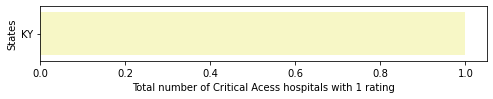

In [46]:
dims = (8, 1)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=index,x=values,palette='Spectral')
ax.set(xlabel='Total number of Critical Acess hospitals with 1 rating', ylabel='States')

In [47]:
#Thus there is only one Critical Acess hospital in USA with 1 star rating which is Kentucky.
#Chidrens Hospitals with 1 star rating
Chidrens_1=hospital_data.loc[(hospital_data["Hospital Type"]=="Childrens") & (hospital_data["Hospital overall rating"]=="1"),["State"]]
C_1=Chidrens_1['State'].value_counts()
C_1
index=C_1.index
values=C_1.values
values
index

Index([], dtype='object')

In [48]:
#Thus there no hospitals for childrens with 5 star rating
#Checking which hospital types are more common
unique_hospital_type=hospital_data['Hospital Type'].unique()
#hospital_data['Hospital Type'].count()

hospital_type=hospital_data.loc[hospital_data['Hospital Type']=='Acute Care Hospitals']
Acute_care=hospital_type['Hospital Type'].count()

hospital_type=hospital_data.loc[hospital_data['Hospital Type']=='Critical Access Hospitals']
Critical_Acess=hospital_type['Hospital Type'].count()

hospital_type=hospital_data.loc[hospital_data['Hospital Type']=='Childrens']
Childrens=hospital_type['Hospital Type'].count()
list=[Acute_care,Critical_Acess,Childrens]
list

[3369, 1344, 99]

[Text(0.5, 0, 'Types of hospitals'), Text(0, 0.5, 'Number of  hospitals')]

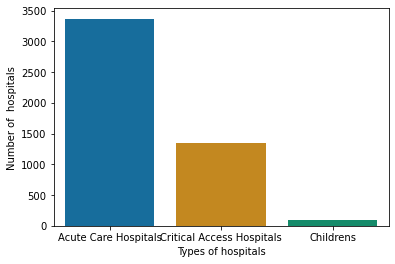

In [49]:
ax=sns.barplot(x=unique_hospital_type,y=list,data=hospital_data,palette='colorblind')
ax.set(xlabel='Types of hospitals', ylabel='Number of  hospitals')

In [50]:
#Thus there are large number of Acute Care Hospitals followed by Critical Acess Hospitals.Childrens hospitals are very rare.
#The average hospital rating, by state
hospital_data['Hospital overall rating'].unique()

clean_hospital_data=hospital_data.drop(hospital_data[hospital_data['Hospital overall rating']=='Not Available'].index)
#clean_hospital_data['Hospital overall rating'].astype(float)
clean_hospital_data['Hospital overall rating'].unique()

array(['3', '2', '4', '5', '1'], dtype=object)

In [51]:
#Converting it to float data type for calculation
clean_hospital_data['Hospital overall rating']=clean_hospital_data['Hospital overall rating'].astype(float)

clean_hospital_data['Hospital overall rating'].mean()
clean_hospital_data['Hospital overall rating'].count()

3567

In [52]:
Statewise_avarage_rating=clean_hospital_data.groupby('State')['Hospital overall rating'].mean()
#Statewise_avarage_rating.sort_values(ascending=False)

In [53]:
#Separating index and values
index=Statewise_avarage_rating.sort_values(ascending=False).index
values=Statewise_avarage_rating.sort_values(ascending=False).values

[Text(0.5, 0, 'Average rating of the hospitals'), Text(0, 0.5, 'State')]

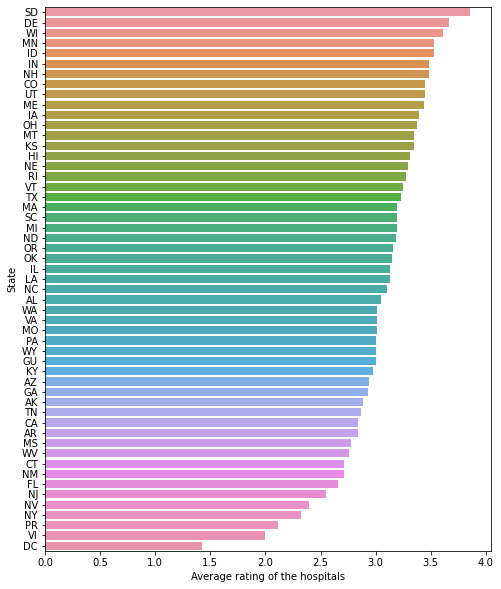

In [54]:
a4_dims = (8, 10)
fig, ax = plt.subplots(figsize=a4_dims)

ax=sns.barplot(y=index,x=values)
ax.set(xlabel='Average rating of the hospitals', ylabel='State')

In [55]:
#Thus South Dacota has the best average rating of the hospitals.District of columbia has the worst average rating.
#Let us check which types of hospitals are more likely to have not submitted proper data
#Which type of hospitals has highest Non-availabilty of Mortality comparison data?
Mortality_NotAvailable=hospital_data.loc[hospital_data['Mortality national comparison']=='Not Available']
Mortality_NotAvailable['Mortality national comparison'].count()

1352

In [56]:
Non_available_data=Mortality_NotAvailable.groupby('Hospital Type')['Mortality national comparison'].count()
#Non_available_data
Non_available_data.sort_values(ascending=False)

Hospital Type
Critical Access Hospitals    736
Acute Care Hospitals         517
Childrens                     99
Name: Mortality national comparison, dtype: int64

In [57]:
index=Non_available_data.sort_values(ascending=False).index
values=Non_available_data.sort_values(ascending=False).values

[Text(0.5, 0, 'Hospitals types'),
 Text(0, 0.5, 'Count of Mortality data Non-Availabilty')]

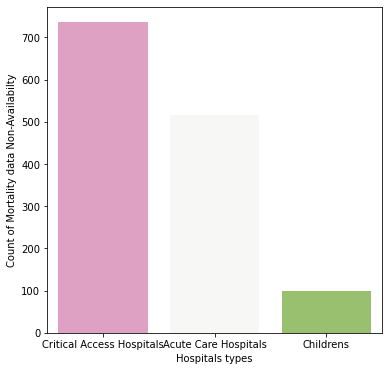

In [58]:
dims = (6, 6)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=values,x=index,palette='PiYG')
ax.set(xlabel='Hospitals types', ylabel='Count of Mortality data Non-Availabilty') 

In [59]:
#Thus Critical Acess hospitals has highest Non-availabilty of mortality comparison of the data and chidrens hospitals has minimum.
#Which type of hospitals has highest Non-availabilty of Safety of Care data?
SafetyOfCare_NotAvailable=hospital_data.loc[hospital_data['Safety of care national comparison']=='Not Available']
SafetyOfCare_NotAvailable['Safety of care national comparison'].count()

2168

In [60]:
SafetyOfCare_NotAvailable=hospital_data.loc[hospital_data['Safety of care national comparison']=='Not Available']
SafetyOfCare_NotAvailable['Safety of care national comparison'].count()
Non_available_data=SafetyOfCare_NotAvailable.groupby('Hospital Type')['Safety of care national comparison'].count()
#Non_available_data
Non_available_data.sort_values(ascending=False)
index=Non_available_data.sort_values(ascending=False).index
values=Non_available_data.sort_values(ascending=False).values

[Text(0.5, 0, 'Hospital Types '),
 Text(0, 0.5, 'Count of Safety of care data Non-Availabilty')]

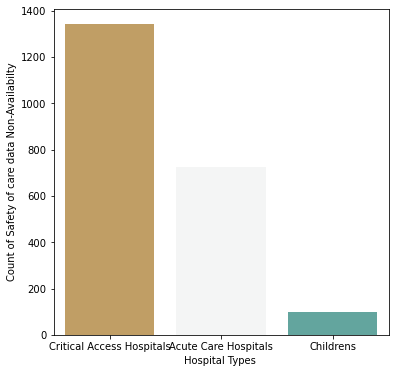

In [61]:
dims = (6, 6)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=values,x=index,palette='BrBG')
ax.set(xlabel='Hospital Types ', ylabel='Count of Safety of care data Non-Availabilty')

The majority of the acute care hospitals and critical access have some sort of Emergency Services, unlike children's hospital. This makes sense as children's hospital is a specialty, usually affiliated with large acute care hospital in health systems.

<AxesSubplot:xlabel='Hospital Type', ylabel='count'>

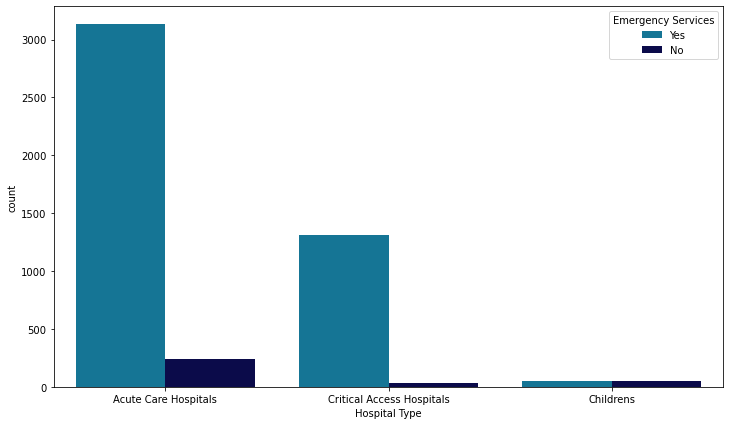

In [81]:
plt.figure(figsize=(12,7))
sns.countplot(x="Hospital Type", data=hospital_data, hue="Emergency Services", palette="ocean_r")

In [62]:
#Which type of hospitals has highest Non-availabilty of Readmission national comparison data?
Readmission_NotAvailable=hospital_data.loc[hospital_data['Readmission national comparison']=='Not Available']
Readmission_NotAvailable['Readmission national comparison'].count()
Non_available_data=Readmission_NotAvailable.groupby('Hospital Type')['Readmission national comparison'].count()
#Non_available_data
Non_available_data.sort_values(ascending=False)
index=Non_available_data.sort_values(ascending=False).index
values=Non_available_data.sort_values(ascending=False).values

[Text(0.5, 0, 'Hospital Types '),
 Text(0, 0.5, 'Count of Readmission data Non-Availabilty')]

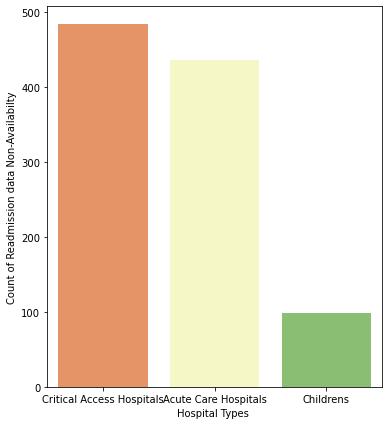

In [63]:
dims = (6, 7)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=values,x=index,palette='RdYlGn')
ax.set(xlabel='Hospital Types ', ylabel='Count of Readmission data Non-Availabilty')